<a href="https://colab.research.google.com/github/M-Naoya/Study-AI/blob/main/%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%EF%BC%88%E5%BE%8C%E7%B7%A8%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 再帰型ニューラルネットワークの概念

## 概要
- RNNとは、時系列データに対応可能なニューラルネットワークのこと。初期の状態と過去の時間t-1の状態を保持し、そこから次の時間でのtを再帰的に求める再帰構造を持つことで時系列データを扱うことが可能になっている。
- 時系列データとは、①時間的順序を追って一定間隔ごとに観察され、②相互に統計的依存関係が認められるようなデータのこと。音声データ、気温データ等が時系列データに該当する。
- BPTTとは、RNNにおけるパラメータ調整方法（誤差逆伝播）の一種。

## 確認テスト
- RNNのネットワークには大きくわけて3つの重みがある。1つは入力から現在の中間層を定義する際にかけられる重み、1つは中間層から出力を定義する際にかけられる重みである。残り1つの重みについて説明せよ。
  - 残り1つの重みは過去の中間層のデータを現在の中間層にわたすときにかけられる重みである。現在の中間層のインプットは、過去の中間層のデータと、現在の入力層のデータの2つになる。
- 連鎖律の原理を使い、dz/dxを求めよ。（5分）z = t**2、t = x +y
  - dz/dx = dz/dt * dt/dx = 2t * 1 = 2t
- 下図のy1をx・s0・s1・win・w・woutを用いて数式で表せ。※バイアスは任意の文字で定義せよ。※また中間層の出力にシグモイド関数g(x)を作用させよ。
  - y1 = g(Wout * S1 + C)、S1 = Win * X1 + W * S0 + b

## 実装演習


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try] weight_init_stdやlearning_rate, hidden_layer_sizeを変更してみよう


### [try] 重みの初期化方法を変更してみよう
Xavier, He

### [try] 中間層の活性化関数を変更してみよう
ReLU(勾配爆発を確認しよう)<br>
tanh(numpyにtanhが用意されている。導関数をd_tanhとして作成しよう)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

iters:0
Loss:200.9454133757883
Pred:[ 8 10 13  7  5  7  2  1]
True:[0 1 1 0 0 0 0 1]
27 + 70 = 2265
------------
iters:100
Loss:26304.761688833933
Pred:[162 118  72  67  48  33   7   1]
True:[1 0 1 0 1 1 1 1]
115 + 60 = 32195
------------
iters:200
Loss:3.502794669764907
Pred:[0 3 1 0 0 0 0 0]
True:[0 1 0 1 0 1 1 0]
47 + 39 = 224
------------
iters:300
Loss:1.3245963411258947
Pred:[1 1 1 0 0 1 1 1]
True:[1 1 0 1 0 1 0 0]
103 + 109 = 231
------------
iters:400
Loss:1.484990690218616
Pred:[0 1 0 0 0 0 0 0]
True:[0 0 1 1 0 1 1 1]
52 + 3 = 64
------------
iters:500
Loss:1.1969587060541227
Pred:[0 0 1 0 0 0 0 0]
True:[0 1 0 0 1 0 1 1]
49 + 26 = 32
------------
iters:600
Loss:1.4197308189184839
Pred:[0 0 1 0 0 1 0 0]
True:[1 1 0 0 0 1 1 1]
117 + 82 = 36
------------
iters:700
Loss:0.320688378717194
Pred:[0 0 1 1 0 0 0 1]
True:[0 0 1 1 0 0 0 1]
12 + 37 = 49
------------
iters:800
Loss:1.6188386702375208
Pred:[1 1 0 1 0 0 0 0]
True:[1 0 0 1 1 0 1 1]
49 + 106 = 208
------------
iters:900
Loss:1

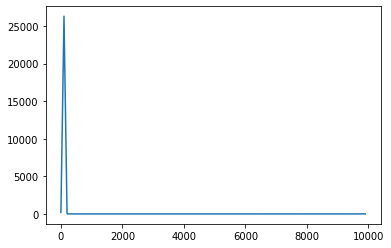

In [4]:
import sys
sys.path.append('/content/drive/MyDrive/002_Work/002_Study-AI/004_深層学習（後編）/DNN_code_colab_lesson_3_4')

import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

#weight_init_std = 1
weight_init_std = 2
#learning_rate = 0.1
learning_rate = 0.2

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size) / np.sqrt(hidden_layer_size)

# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.relu(u[:,t+1])

        y[:,t] = functions.relu(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

# LSTM

## 概要
- LSTMとは、「時系列を遡れば遡るほど勾配が消失していくため、長い時系列の学習が困難」というRNNの課題を解決した手法。ReLU関数を使用する等の方法ではなく、構造自体を変えることで課題を解決している。
- CECとは、過去のデータを保存するためのユニットのこと。入力データの重みが一律で学習特性がないという課題（入力重み衝突、出力重み衝突）がある。これを解決するため、入力・出力ゲートが設けられている。それぞれのゲートで入力値の重みを可変可能としている。
- CECには過去の情報がすべて保管されており、要らなくなった情報まで保管され続けるという課題があった。これを解決したのが忘却ゲートである。忘却ゲートは情報が要らなくなった時点でその情報を忘却する機能を持つ。
- のぞき穴結合とは、CEC自身の値に、重み行列を介して他のノードに情報を伝播させたり、任意のタイミングで忘却させることを可能にした構造。

## 確認テスト
- シグモイド関数を微分した時、入力値が0の時に最大値をとる。その値として正しいものを選択肢から選べ。
  - (1 - sigmoid(x)) * sigmoid(x)のxに0を代入すると、0.25なので、（2）が正しい。
- 以下の文章をLSTMに入力し空欄に当てはまる単語を予測したいとする。文中の「とても」という言葉は空欄の予測においてなくなっても影響を及ぼさないと考えられる。このような場合、どのゲートが作用すると考えられるか。「映画おもしろかったね。ところで、とてもお腹が空いたから何か____。」（3分）確認テスト
  - 忘却ゲート。空欄の予測には不要な情報のため忘却してしまって良いから。


In [5]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))
x = 0
(1 - sigmoid(x)) * sigmoid(x)

0.25

## 実装演習
- 演習チャレンジのコードを実装する。

In [7]:
def lstm(x, prev_h, prev_c, W, U, b):

  lstm_in = activation(x.dot(W.T) + prev_h.dot(U.T) + b)
  a, i, f, o = np.hsplit(lstm_in, 4)

  a = np.tanh(a)
  input_gate = _sigmoid(i)
  forget_gate = _sigmoid(f)
  output_gate = _sigmoid(o)

  c = input_gate* a + forget_gate* c
  h = output_gate * np.tanh(c)
  return c, h


# GRU

## 概要
- GRUとは、LSTMのパラメータ数を大幅に削減しつつ、精度はLSTM同等かそれ以上を保つことに成功した構造。メリットは、パラメータ数が少ないため計算不可が低いこと。これにより、LSTMのパラメータ数が多く、計算不可が高くなるという課題を解決した。

## 確認テスト
- LSTMとCECが抱える課題について、それぞれ簡潔に述べよ。（3分）
  - LSTMの課題：パラメータ数が多いため、計算不可が高い。
  - CECの課題：①入力重み衝突と出力重み衝突により重みがうまく学習できず精度が上がりづらい→入力ゲート、出力ゲートにより解決。②過去の不要な情報まで保持してしまう。→忘却ゲートにより解決。
- LSTMとGRUの違いを簡潔に述べよ。
  - パラメータ数の違い。LSTMはパラメータ数が多く計算負荷が高くなるという課題があるのに対し、GRUはパラメータ数が少なく計算負荷は低い。


## 実装演習
- 演習チャレンジを実装

In [8]:
def gru(x, h, W_r, U_r, W_z, U_z, W, U):
  r = _sigmoid(x.dot(W_r.T + h.dot(U_r.T)))
  z = _sigmoid(x.dot(W_z.T + h.dot(U_z.T)))

  h_bar = np.tanh(x.dot(W.T) + (r*h).dot(U.T))
  h_new = (1-z) * h + z * h_bar
  return h_new


# 双方向RNN

## 概要
- 双方向RNNとは、過去の情報だけでなく未来の情報を加味することで精度を向上させるためのモデル。文章の推敲や機械翻訳等で用いられている。
- 最初のステップから順方向に予想するのと同時に、最後のステップからの逆方向の予測も行う。
- 双方向RNNはBRNNとも言う。
- 活用事例として誤字脱字検出プログラムへの利用例を確認した。

## 確認テスト
- 以下は双方向RNNの順伝播を行うプログラムである。順方向については、入力から中間層への重みW_f, 一ステップ前の中間層出力から中間層への重みをU_f、逆方向に関しては同様にパラメータW_b, U_bを持ち、両者の中間層表現を合わせた特徴から出力層への重みはVである。_rnn関数はRNNの順伝播を表し中間層の系列を返す関数であるとする。（か）にあてはまるのはどれか
  - （4）np.concatenate([h_f, h_b[::-1]], axis=1)が正しい。順方向に伝播したときの中間層表現h_f、逆方向に伝播したときの中間層表現h_bをあわせているから。

## 実装演習

In [9]:
def bidirectional_rnn_net(xs, W_f, U_f, W_b, U_b, V):
  xs_f = np.zeros_like(xs)
  xs_b = np.zeros_like(xs)
  for i, x in enumerate(xs):
    xs_f[i] = x
    xs_b[i] = x[::-1]
  hs_f = _rnn(xs_f, W_f, U_f)
  hs_b = _rnn(xs_b, W_b, U_b)
  hs = [np.concatenate([h_f, h_b[::-1]], axis=1) for h_f, h_b in zip(hs_f, hs_b)]
  ys = hs.dot(V.T)
  return ys

# Seq2Seq

## 概要
- Seq2SeqとはEncoder-Decoderモデルの一種。Googleにより開発された技術で、機械対話や機械翻訳などに使用されている。
- Encoder RNNとは、ユーザーがインプットしたテキストデータを単語等のトークンに区切って渡す構造のこと。処理手順としては、vec1をRNNに入力→hidden stateを出力→前のhidden stateとvec2をRNNに入力、以降は繰り返し。最後のhidden stateをfinal stateとしてとっておき、これが入力した文の意味を表すベクトルとなる。これをthought vectorと呼ぶ。
- Decoder RNNとは、システムがアウトプットデータを、単語等のトークンごとに生成する構造。
- Seq2Seqの一問一答しかできない課題を解決したのがHRED。過去n-1この発話から次の発話を生成する。会話の流れのような多様性を表現できないこと、情報量に乏しい答えをしがちという課題がある。VHREDでHREDの課題は解決される。
- オートエンコーダとは、教師なし学習の一つ。オートエンコーダのメリットは次元削減が行えること。
- オートエンコーダーの潜在変数zに正規分布を仮定することで構造把握を可能にしたものをVAEという。

## 確認テスト
- 下記の選択肢から、seq2seqについて説明しているものを選べ。
  - （2）RNNを用いたEncoder-Decoderモデルの一種であり、機械翻訳などのモデルに使われる。が正しい。
  - 1は双方向RNN、3は再帰型ニューラルネットワークの概念、4はLSTMの説明
- seq2seqとHRED、HREDとVHREDの違いを簡潔に述べよ。
  - seq2seqの一問一答しかできない課題を解決したのがHRED。HREDの短い応答しかできない、会話の流れを表現できない課題を解決したのがVHRED。
- VAEに関する下記の説明文中の空欄に当てはまる言葉を答えよ。自己符号化器の潜在変数に____を導入したもの。（1分）確認テスト
  - 確率分布z∼N(0,1)

## 実装演習

In [10]:
def encode(words, E, W, U, b):
    hidden_size = W.shape[0]
    h = np.zeros(hidden_size)
    for w in words:
      e = E.dot(w)
      h = _activation(W.dot(e) + U.dot(h) + b)
    return h

# Word2vec

## 概要
- Word2vecはGoogleの開発者によって提案された手法で、「意味ベクトル」という単語のベクトル表現を可能にする手法のこと。
- Word2vecでは学習データからボキャブラリを作成する。例えばapplesを入力すると、applesのラベルだけ1で、それ以外のボキャブラリにある単語のラベルが0のベクトルが入力される。
- 大規模データの分散表現の学習が、現実的な計算速度とメモリ量で実現可能になったことがメリットである。

## 確認テスト
- 本セクションでは確認テストなし。

## 実装演習
- 本セクションでは実装演習なし。

## 関連記事
- word2vecの活用例の一つとして、レコメンドシステムへの適用事例を調査した。下記記事ではword2vecをサービスに適用し、従来のレコメンドシステムよりword2vecを使用したレコメンドシステムのほうが効果が高いことを説明している。
https://www.slideshare.net/recruitcojp/ss-56150629  参照

# Attention Mechanism

## 概要
- Seq2seqの課題として、長い文章への対応が難しいというものがあった。これを解決したのがAttention Mechanismである。入力と出力のどの単語が関連しているのかという関連度を学習する仕組みになっている。

## 確認テスト
- RNNとword2vec、seq2seqとAttentionの違いを簡潔に述べよ。
  - 固定長の文字列しか扱えないというRNNの課題を解決し可変長の文字列を扱えるようにしたのがword2vec。長い文章が扱いにくいというseq2seqの課題を解決したのがAttention。

## 実装演習
- 本セクションでは実装演習なし。

## 関連記事
- 以下記事では、Attention Mechanismを画像分類モデルに活用した事例が紹介されている。本事例のようにAttention Mechanismは自然言語処理だけでなく、その他領域にも活用されていることがわかる。
https://www.softbanktech.co.jp/special/blog/cloud_blog/2019/0063/  参照

# 強化学習

## 概要
- 強化学習とは、行動の結果として与えられる報酬をもとに行動を決定する原理を改善していく仕組みのこと。より報酬が得られる行動を取るように学習していく。
- 強化学習では、環境についての知識は不完全であると仮定する。
- Q学習、関数近似法により強化学習の開発が進展した。Q学習は行動価値関数を行動するごとに更新することにより学習をすすめる方法。関数近似値法は、価値関数や方策関数を関数近似する方法のこと。
- 価値関数は状態価値関数と行動価値関数の2種類ある。
  - 状態価値関数：ある状態の価値に注目する場合。
  - 行動価値関数：状態と価値を組み合わせた価値に注目する場合。
- 方策関数はある状態でどの行動をとるのか、の確率を与える関数のこと。

## 確認テスト
- 本セクションでは確認テストなし。

## 実装演習
- 本セクションでは実装演習なし。

## 関連記事
- 以下記事では強化学習の活用事例が紹介されている。オンラインゲームにおける顧客体験向上から自然エネルギー発電網の最適化まで活用事例は非常に幅広く、非常に汎用性の高い技術と考える。
https://ledge.ai/reinforcement-learning/　参照

# AlphaGo

## 概要
- Google DeepMindによって開発された以後プログラムのこと。人間のプロ囲碁棋士を破った初のプログラムである。
- モンテカルロ木探索はコンピュータ囲碁ソフトで現在最も有効とされている探索方法。AophaGoにおいても使用されている。
- AlphaGoでは教師あり学習→強化学習のステップで学習を行っていたのに対し、AlphaGo Zeroでは教師あり学習のステップがなくなり強化学習のみで作成されている。

## 確認テスト
- 本セクションでは確認テストなし。

## 実装演習
- 本セクションでは実装演習なし。

## 関連記事
- AlphaGoシリーズの最新モデルであるMuZeroが以下記事にて紹介されている。特筆すべき点としては、ゲームのルールすら学習させていない状態から学習する点である。
https://xtrend.nikkei.com/atcl/contents/technology/00007/00032/　　参照

# 軽量化・高速化技術

## 概要
- 深層学習においては、軽量化・高速化は重要。多くのデータを使用したり大量のパラメータ調整が求められるため。複数の計算資源を使用し並列的に入ラルネットを構成することで効率の良い学習を行う分散深層学習が必要になる。主な高速化手法は以下。
  - データ並列化：親モデルを各ワーカーに子モデルとしてコピー。これら子モデルにデータを分割し、計算させる。パラメータの更新方法により同期型と非同期型がある。
  - モデル並列化：親モデルを書くワーカーに分割しそれぞれのモデルを学習させる。最後に一つのモデルに復元する。モデルが大きいときに有効。
  - GPUによる高速技術：もともとはグラフィック用途だが、簡単な並列処理が得意でニューラルネットと相性が良いため、高速化が可能になる。
- モデルの軽量化とは、モデルの精度を維持しつつパラメータや演算回数を低減する手法の総称。モデル軽量化が求められるようになった背景としてはIoTやモバイル端末の普及がある。性能が低いこれら端末においても処理を行えるようにするためモデル軽量化が求められるようになった。主な軽量化手法は以下。
  - 量子化：64floatのパラメータを32float等の下位の精度に落としメモリと演算処理の削減を行う。軽量化は実現できるが、精度低下の課題がある。
  - 蒸留：学習済みの規模の大きなモデルの知識を軽量なモデルへ継承させることで軽量化を図る。
  - プルーリング：モデルの精度向上に寄与していないニューロンを削除する。

## 確認テスト
- 本セクションでは確認テストなし。

## 実装演習
- 本セクションでは実装演習なし。

## 関連記事
- 以下記事では、Google Cloud TPUというGCP上の高速化技術について紹介されている。TPUは行列計算を高速に処理することを目的にGoogleが開発したハードウェア。このようにクラウド上サービスを活用することで実際のハードウェアを調達しなくとも、高速化を図れると考える。
https://techblog.zozo.com/entry/tpu_metric_learning　　参照

# 応用モデル

## 概要
- MobileNet：計算コストの高い一般的な畳み込みレイヤーを改善し、軽量化を実現した手法。Depthwise Convolution、Pointwise Convolutionの組み合わせで軽量化を実現している。
- DenseNet：畳み込みネットワークの一つ。層が深くなるにつれて学習が難しくなるというニューラルネットワークの課題を解決したアーキテクチャ。
- Wavenet：生の音声波形を生成する深層学習モデル。このモデルでは時系列データに対して畳み込みを適用している。

## 確認テスト
- 深層学習を用いて結合確率を学習する際に、効率的に学習が行えるアーキテクチャを提案したことがWaveNet の大きな貢献の1 つである。提案された新しいConvolution 型アーキテクチャは（あ）と呼ばれ、結合確率を効率的に学習できるようになっている。
  - Dilated causal convolutionが入る。
- （あ）を用いた際の大きな利点は、単純なConvolution layer と比べて（い）ことである。
  - パラメータ数に対する受容野が広いが入る。

## 実装演習
- 本セクションでは実装演習なし。

# Transformer

## 概要
- 自然言語処理において、BERTやXLnet、GPT-2など様々なモデルが近年研究されているが、いずれもTramsformerをモデルとしている。Transformerは自然言語処理の分野だけでなく他分野にも応用され高い性能を発揮している。
- Transformerは以下のような特徴がある。
  - Seq2seqよりも早く精度が高い。
  - RNN、CNNを使わずAttentionのみを使用したEncoder-Decoderモデルで、並列計算も可能になっている。
- 関連記事：https://qiita.com/omiita/items/07e69aef6c156d23c538

## 確認テスト
- 本セクションではなし。

## 実装演習

In [13]:
! wget https://www.dropbox.com/s/9narw5x4uizmehh/utils.py
! mkdir images data

# data取得
! wget https://www.dropbox.com/s/o4kyc52a8we25wy/dev.en -P data/
! wget https://www.dropbox.com/s/kdgskm5hzg6znuc/dev.ja -P data/
! wget https://www.dropbox.com/s/gyyx4gohv9v65uh/test.en -P data/
! wget https://www.dropbox.com/s/hotxwbgoe2n013k/test.ja -P data/
! wget https://www.dropbox.com/s/5lsftkmb20ay9e1/train.en -P data/
! wget https://www.dropbox.com/s/ak53qirssci6f1j/train.ja -P data/

--2021-07-19 12:23:51--  https://www.dropbox.com/s/9narw5x4uizmehh/utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9narw5x4uizmehh/utils.py [following]
--2021-07-19 12:23:51--  https://www.dropbox.com/s/raw/9narw5x4uizmehh/utils.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce004f34883971b06dff8a19565.dl.dropboxusercontent.com/cd/0/inline/BSmoiLXRl0jSAzc2iUi38_LQlhhMvO3SZ47tjT3XC_JCW0cyihYgs4eIggSDs8TduYevU-MxvjGkz1pYnQTe-u290SFx1FRth61wgBIqQIzjnU6bSSiygQacf_cNUb_QvH4taqW9STQqIw5XYoFyuZpG/file# [following]
--2021-07-19 12:23:52--  https://uce004f34883971b06dff8a19565.dl.dropboxusercontent.com/cd/0/inline/BSmoiLXRl0jSAzc2iUi38_LQlhhMvO3SZ47tjT3XC_JCW0cyihYgs4eIggSDs8TduYevU-MxvjGkz1pYnQTe-u290SFx1FRth61wgB

In [14]:
import time
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk import bleu_score

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from utils import Vocab

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(1)
random_state = 42

In [15]:
print(torch.__version__)

1.9.0+cu102


In [16]:
PAD = 0
UNK = 1
BOS = 2
EOS = 3

PAD_TOKEN = '<PAD>'
UNK_TOKEN = '<UNK>'
BOS_TOKEN = '<S>'
EOS_TOKEN = '</S>'

In [17]:
def load_data(file_path):
    """
    テキストファイルからデータを読み込む
    :param file_path: str, テキストファイルのパス
    :return data: list, 文章（単語のリスト）のリスト
    """
    data = []
    for line in open(file_path, encoding='utf-8'):
        words = line.strip().split()  # スペースで単語を分割
        data.append(words)
    return data

train_X = load_data('./data/train.en')
train_Y = load_data('./data/train.ja')

# 訓練データと検証データに分割
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=random_state)

# データセットの中身を確認
print('train_X:', train_X[:5])
print('train_Y:', train_Y[:5])

train_X: [['where', 'shall', 'we', 'eat', 'tonight', '?'], ['i', 'made', 'a', 'big', 'mistake', 'in', 'choosing', 'my', 'wife', '.'], ['i', "'ll", 'have', 'to', 'think', 'about', 'it', '.'], ['it', 'is', 'called', 'a', 'lily', '.'], ['could', 'you', 'lend', 'me', 'some', 'money', 'until', 'this', 'weekend', '?']]
train_Y: [['今夜', 'は', 'どこ', 'で', '食事', 'を', 'し', 'よ', 'う', 'か', '。'], ['僕', 'は', '妻', 'を', '選', 'ぶ', 'の', 'に', '大変', 'な', '間違い', 'を', 'し', 'た', '。'], ['考え', 'と', 'く', 'よ', '。'], ['ｌｉｌｙ', 'と', '呼', 'ば', 'れ', 'て', 'い', 'ま', 'す', '。'], ['今週末', 'まで', 'いくら', 'か', '金', 'を', '貸', 'し', 'て', 'くれ', 'ま', 'せ', 'ん', 'か', '。']]


In [18]:
MIN_COUNT = 2  # 語彙に含める単語の最低出現回数

word2id = {
    PAD_TOKEN: PAD,
    BOS_TOKEN: BOS,
    EOS_TOKEN: EOS,
    UNK_TOKEN: UNK,
    }

vocab_X = Vocab(word2id=word2id)
vocab_Y = Vocab(word2id=word2id)
vocab_X.build_vocab(train_X, min_count=MIN_COUNT)
vocab_Y.build_vocab(train_Y, min_count=MIN_COUNT)

vocab_size_X = len(vocab_X.id2word)
vocab_size_Y = len(vocab_Y.id2word)

In [19]:
def sentence_to_ids(vocab, sentence):
    """
    単語のリストをインデックスのリストに変換する
    :param vocab: Vocabのインスタンス
    :param sentence: list of str
    :return indices: list of int
    """
    ids = [vocab.word2id.get(word, UNK) for word in sentence]
    ids = [BOS] + ids + [EOS]  # EOSを末尾に加える
    return ids

In [20]:
train_X = [sentence_to_ids(vocab_X, sentence) for sentence in train_X]
train_Y = [sentence_to_ids(vocab_Y, sentence) for sentence in train_Y]
valid_X = [sentence_to_ids(vocab_X, sentence) for sentence in valid_X]
valid_Y = [sentence_to_ids(vocab_Y, sentence) for sentence in valid_Y]

In [21]:
class DataLoader(object):
    def __init__(self, src_insts, tgt_insts, batch_size, shuffle=True):
        """
        :param src_insts: list, 入力言語の文章（単語IDのリスト）のリスト
        :param tgt_insts: list, 出力言語の文章（単語IDのリスト）のリスト
        :param batch_size: int, バッチサイズ
        :param shuffle: bool, サンプルの順番をシャッフルするか否か
        """
        self.data = list(zip(src_insts, tgt_insts))

        self.batch_size = batch_size
        self.shuffle = shuffle
        self.start_index = 0
        
        self.reset()
    
    def reset(self):
        if self.shuffle:
            self.data = shuffle(self.data, random_state=random_state)
        self.start_index = 0
    
    def __iter__(self):
        return self
    
    def __next__(self):

        def preprocess_seqs(seqs):
            # パディング
            max_length = max([len(s) for s in seqs])
            data = [s + [PAD] * (max_length - len(s)) for s in seqs]
            # 単語の位置を表現するベクトルを作成
            positions = [[pos+1 if w != PAD else 0 for pos, w in enumerate(seq)] for seq in data]
            # テンソルに変換
            data_tensor = torch.tensor(data, dtype=torch.long, device=device)
            position_tensor = torch.tensor(positions, dtype=torch.long, device=device)
            return data_tensor, position_tensor            

        # ポインタが最後まで到達したら初期化する
        if self.start_index >= len(self.data):
            self.reset()
            raise StopIteration()

        # バッチを取得して前処理
        src_seqs, tgt_seqs = zip(*self.data[self.start_index:self.start_index+self.batch_size])
        src_data, src_pos = preprocess_seqs(src_seqs)
        tgt_data, tgt_pos = preprocess_seqs(tgt_seqs)

        # ポインタを更新する
        self.start_index += self.batch_size

        return (src_data, src_pos), (tgt_data, tgt_pos)

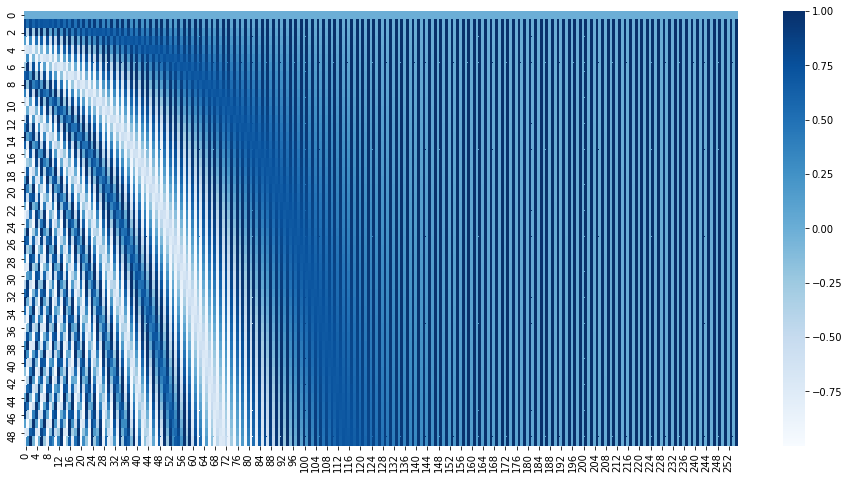

In [22]:
def position_encoding_init(n_position, d_pos_vec):
    """
    Positional Encodingのための行列の初期化を行う
    :param n_position: int, 系列長
    :param d_pos_vec: int, 隠れ層の次元数
    :return torch.tensor, size=(n_position, d_pos_vec)
    """
    # PADがある単語の位置はpos=0にしておき、position_encも0にする
    position_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / d_pos_vec) for j in range(d_pos_vec)]
        if pos != 0 else np.zeros(d_pos_vec) for pos in range(n_position)])
    position_enc[1:, 0::2] = np.sin(position_enc[1:, 0::2])  # dim 2i
    position_enc[1:, 1::2] = np.cos(position_enc[1:, 1::2])  # dim 2i+1
    return torch.tensor(position_enc, dtype=torch.float)
  
pe = position_encoding_init(50, 256).numpy()
plt.figure(figsize=(16,8))
sns.heatmap(pe, cmap='Blues')
plt.show()

In [23]:
class ScaledDotProductAttention(nn.Module):
    
    def __init__(self, d_model, attn_dropout=0.1):
        """
        :param d_model: int, 隠れ層の次元数
        :param attn_dropout: float, ドロップアウト率
        """
        super(ScaledDotProductAttention, self).__init__()
        self.temper = np.power(d_model, 0.5)  # スケーリング因子
        self.dropout = nn.Dropout(attn_dropout)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, q, k, v, attn_mask):
        """
        :param q: torch.tensor, queryベクトル, 
            size=(n_head*batch_size, len_q, d_model/n_head)
        :param k: torch.tensor, key, 
            size=(n_head*batch_size, len_k, d_model/n_head)
        :param v: torch.tensor, valueベクトル, 
            size=(n_head*batch_size, len_v, d_model/n_head)
        :param attn_mask: torch.tensor, Attentionに適用するマスク, 
            size=(n_head*batch_size, len_q, len_k)
        :return output: 出力ベクトル, 
            size=(n_head*batch_size, len_q, d_model/n_head)
        :return attn: Attention
            size=(n_head*batch_size, len_q, len_k)
        """
        # QとKの内積でAttentionの重みを求め、スケーリングする
        attn = torch.bmm(q, k.transpose(1, 2)) / self.temper  # (n_head*batch_size, len_q, len_k)
        # Attentionをかけたくない部分がある場合は、その部分を負の無限大に飛ばしてSoftmaxの値が0になるようにする
        attn.data.masked_fill_(attn_mask, -float('inf'))
        
        attn = self.softmax(attn)
        attn = self.dropout(attn)
        output = torch.bmm(attn, v)

        return output, attn
class MultiHeadAttention(nn.Module):
    def __init__(self, n_head, d_model, d_k, d_v, dropout=0.1):
        """
        :param n_head: int, ヘッド数
        :param d_model: int, 隠れ層の次元数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param dropout: float, ドロップアウト率
        """
        super(MultiHeadAttention, self).__init__()

        self.n_head = n_head
        self.d_k = d_k
        self.d_v = d_v

        # 各ヘッドごとに異なる重みで線形変換を行うための重み
        # nn.Parameterを使うことで、Moduleのパラメータとして登録できる. TFでは更新が必要な変数はtf.Variableでラップするのでわかりやすい
        self.w_qs = nn.Parameter(torch.empty([n_head, d_model, d_k], dtype=torch.float))
        self.w_ks = nn.Parameter(torch.empty([n_head, d_model, d_k], dtype=torch.float))
        self.w_vs = nn.Parameter(torch.empty([n_head, d_model, d_v], dtype=torch.float))
        # nn.init.xavier_normal_で重みの値を初期化
        nn.init.xavier_normal_(self.w_qs)
        nn.init.xavier_normal_(self.w_ks)
        nn.init.xavier_normal_(self.w_vs)

        self.attention = ScaledDotProductAttention(d_model)
        self.layer_norm = nn.LayerNorm(d_model) # 各層においてバイアスを除く活性化関数への入力を平均０、分散１に正則化
        self.proj = nn.Linear(n_head*d_v, d_model)  # 複数ヘッド分のAttentionの結果を元のサイズに写像するための線形層
        # nn.init.xavier_normal_で重みの値を初期化
        nn.init.xavier_normal_(self.proj.weight)
        
        self.dropout = nn.Dropout(dropout)


    def forward(self, q, k, v, attn_mask=None):
        """
        :param q: torch.tensor, queryベクトル, 
            size=(batch_size, len_q, d_model)
        :param k: torch.tensor, key, 
            size=(batch_size, len_k, d_model)
        :param v: torch.tensor, valueベクトル, 
            size=(batch_size, len_v, d_model)
        :param attn_mask: torch.tensor, Attentionに適用するマスク, 
            size=(batch_size, len_q, len_k)
        :return outputs: 出力ベクトル, 
            size=(batch_size, len_q, d_model)
        :return attns: Attention
            size=(n_head*batch_size, len_q, len_k)
            
        """
        d_k, d_v = self.d_k, self.d_v
        n_head = self.n_head

        # residual connectionのための入力 出力に入力をそのまま加算する
        residual = q

        batch_size, len_q, d_model = q.size()
        batch_size, len_k, d_model = k.size()
        batch_size, len_v, d_model = v.size()

        # 複数ヘッド化
        # torch.repeat または .repeatで指定したdimに沿って同じテンソルを作成
        q_s = q.repeat(n_head, 1, 1) # (n_head*batch_size, len_q, d_model)
        k_s = k.repeat(n_head, 1, 1) # (n_head*batch_size, len_k, d_model)
        v_s = v.repeat(n_head, 1, 1) # (n_head*batch_size, len_v, d_model)
        # ヘッドごとに並列計算させるために、n_headをdim=0に、batch_sizeをdim=1に寄せる
        q_s = q_s.view(n_head, -1, d_model) # (n_head, batch_size*len_q, d_model)
        k_s = k_s.view(n_head, -1, d_model) # (n_head, batch_size*len_k, d_model)
        v_s = v_s.view(n_head, -1, d_model) # (n_head, batch_size*len_v, d_model)

        # 各ヘッドで線形変換を並列計算(p16左側`Linear`)
        q_s = torch.bmm(q_s, self.w_qs)  # (n_head, batch_size*len_q, d_k)
        k_s = torch.bmm(k_s, self.w_ks)  # (n_head, batch_size*len_k, d_k)
        v_s = torch.bmm(v_s, self.w_vs)  # (n_head, batch_size*len_v, d_v)
        # Attentionは各バッチ各ヘッドごとに計算させるためにbatch_sizeをdim=0に寄せる
        q_s = q_s.view(-1, len_q, d_k)   # (n_head*batch_size, len_q, d_k)
        k_s = k_s.view(-1, len_k, d_k)   # (n_head*batch_size, len_k, d_k)
        v_s = v_s.view(-1, len_v, d_v)   # (n_head*batch_size, len_v, d_v)

        # Attentionを計算(p16.左側`Scaled Dot-Product Attention * h`)
        outputs, attns = self.attention(q_s, k_s, v_s, attn_mask=attn_mask.repeat(n_head, 1, 1))

        # 各ヘッドの結果を連結(p16左側`Concat`)
        # torch.splitでbatch_sizeごとのn_head個のテンソルに分割
        outputs = torch.split(outputs, batch_size, dim=0)  # (batch_size, len_q, d_model) * n_head
        # dim=-1で連結
        outputs = torch.cat(outputs, dim=-1)  # (batch_size, len_q, d_model*n_head)

        # residual connectionのために元の大きさに写像(p16左側`Linear`)
        outputs = self.proj(outputs)  # (batch_size, len_q, d_model)
        outputs = self.dropout(outputs)
        outputs = self.layer_norm(outputs + residual)

        return outputs, attns

class PositionwiseFeedForward(nn.Module):
    """
    :param d_hid: int, 隠れ層1層目の次元数
    :param d_inner_hid: int, 隠れ層2層目の次元数
    :param dropout: float, ドロップアウト率
    """
    def __init__(self, d_hid, d_inner_hid, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()
        # window size 1のconv層を定義することでPosition wiseな全結合層を実現する.
        self.w_1 = nn.Conv1d(d_hid, d_inner_hid, 1)
        self.w_2 = nn.Conv1d(d_inner_hid, d_hid, 1)
        self.layer_norm = nn.LayerNorm(d_hid)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        :param x: torch.tensor,
            size=(batch_size, max_length, d_hid)
        :return: torch.tensor,
            size=(batch_size, max_length, d_hid) 
        """
        residual = x
        output = self.relu(self.w_1(x.transpose(1, 2)))
        output = self.w_2(output).transpose(2, 1)
        output = self.dropout(output)
        return self.layer_norm(output + residual)
  
def get_attn_padding_mask(seq_q, seq_k):
    """
    keyのPADに対するattentionを0にするためのマスクを作成する
    :param seq_q: tensor, queryの系列, size=(batch_size, len_q)
    :param seq_k: tensor, keyの系列, size=(batch_size, len_k)
    :return pad_attn_mask: tensor, size=(batch_size, len_q, len_k)
    """
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    pad_attn_mask = seq_k.data.eq(PAD).unsqueeze(1)   # (N, 1, len_k) PAD以外のidを全て0にする
    pad_attn_mask = pad_attn_mask.expand(batch_size, len_q, len_k) # (N, len_q, len_k)
    return pad_attn_mask

_seq_q = torch.tensor([[1, 2, 3]])
_seq_k = torch.tensor([[4, 5, 6, 7, PAD]])
_mask = get_attn_padding_mask(_seq_q, _seq_k)  # 行がquery、列がkeyに対応し、key側がPAD(=0)の時刻だけ1で他が0の行列ができる
print('query:\n', _seq_q)
print('key:\n', _seq_k)
print('mask:\n', _mask)

def get_attn_subsequent_mask(seq):
    """
    未来の情報に対するattentionを0にするためのマスクを作成する
    :param seq: tensor, size=(batch_size, length)
    :return subsequent_mask: tensor, size=(batch_size, length, length)
    """
    attn_shape = (seq.size(1), seq.size(1))
    # 上三角行列(diagonal=1: 対角線より上が1で下が0)
    subsequent_mask = torch.triu(torch.ones(attn_shape, dtype=torch.uint8, device=device), diagonal=1)
    subsequent_mask = subsequent_mask.repeat(seq.size(0), 1, 1)
    return subsequent_mask

_seq = torch.tensor([[1,2,3,4]])
_mask = get_attn_subsequent_mask(_seq)  # 行がquery、列がkeyに対応し、queryより未来のkeyの値が1で他は0の行列ができいる
print('seq:\n', _seq)
print('mask:\n', _mask)

query:
 tensor([[1, 2, 3]])
key:
 tensor([[4, 5, 6, 7, 0]])
mask:
 tensor([[[False, False, False, False,  True],
         [False, False, False, False,  True],
         [False, False, False, False,  True]]])
seq:
 tensor([[1, 2, 3, 4]])
mask:
 tensor([[[0, 1, 1, 1],
         [0, 0, 1, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 0]]], dtype=torch.uint8)


In [24]:
class EncoderLayer(nn.Module):
    """Encoderのブロックのクラス"""
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        """
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param dropout: float, ドロップアウト率
        """
        super(EncoderLayer, self).__init__()
        # Encoder内のSelf-Attention
        self.slf_attn = MultiHeadAttention(
            n_head, d_model, d_k, d_v, dropout=dropout)
        # Postionwise FFN
        self.pos_ffn = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)

    def forward(self, enc_input, slf_attn_mask=None):
        """
        :param enc_input: tensor, Encoderの入力, 
            size=(batch_size, max_length, d_model)
        :param slf_attn_mask: tensor, Self Attentionの行列にかけるマスク, 
            size=(batch_size, len_q, len_k)
        :return enc_output: tensor, Encoderの出力, 
            size=(batch_size, max_length, d_model)
        :return enc_slf_attn: tensor, EncoderのSelf Attentionの行列, 
            size=(n_head*batch_size, len_q, len_k)
        """
        # Self-Attentionのquery, key, valueにはすべてEncoderの入力（enc_input）が入る
        enc_output, enc_slf_attn = self.slf_attn(
            enc_input, enc_input, enc_input, attn_mask=slf_attn_mask)
        enc_output = self.pos_ffn(enc_output)
        return enc_output, enc_slf_attn

class Encoder(nn.Module):
    """EncoderLayerブロックからなるEncoderのクラス"""
    def __init__(
            self, n_src_vocab, max_length, n_layers=6, n_head=8, d_k=64, d_v=64,
            d_word_vec=512, d_model=512, d_inner_hid=1024, dropout=0.1):
        """
        :param n_src_vocab: int, 入力言語の語彙数
        :param max_length: int, 最大系列長
        :param n_layers: int, レイヤー数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param d_word_vec: int, 単語の埋め込みの次元数
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param dropout: float, ドロップアウト率        
        """
        super(Encoder, self).__init__()

        n_position = max_length + 1
        self.max_length = max_length
        self.d_model = d_model

        # Positional Encodingを用いたEmbedding
        self.position_enc = nn.Embedding(n_position, d_word_vec, padding_idx=PAD)
        self.position_enc.weight.data = position_encoding_init(n_position, d_word_vec)

        # 一般的なEmbedding
        self.src_word_emb = nn.Embedding(n_src_vocab, d_word_vec, padding_idx=PAD)

        # EncoderLayerをn_layers個積み重ねる
        self.layer_stack = nn.ModuleList([
            EncoderLayer(d_model, d_inner_hid, n_head, d_k, d_v, dropout=dropout)
            for _ in range(n_layers)])

    def forward(self, src_seq, src_pos):
        """
        :param src_seq: tensor, 入力系列, 
            size=(batch_size, max_length)
        :param src_pos: tensor, 入力系列の各単語の位置情報,
            size=(batch_size, max_length)
        :return enc_output: tensor, Encoderの最終出力, 
            size=(batch_size, max_length, d_model)
        :return enc_slf_attns: list, EncoderのSelf Attentionの行列のリスト
        """
        # 一般的な単語のEmbeddingを行う
        enc_input = self.src_word_emb(src_seq)
        # Positional EncodingのEmbeddingを加算する
        enc_input += self.position_enc(src_pos)

        enc_slf_attns = []
        enc_output = enc_input
        # key(=enc_input)のPADに対応する部分のみ1のマスクを作成
        enc_slf_attn_mask = get_attn_padding_mask(src_seq, src_seq)

        # n_layers個のEncoderLayerに入力を通す
        for enc_layer in self.layer_stack:
            enc_output, enc_slf_attn = enc_layer(
                enc_output, slf_attn_mask=enc_slf_attn_mask)
            enc_slf_attns += [enc_slf_attn]

        return enc_output, enc_slf_attns

class DecoderLayer(nn.Module):
    """Decoderのブロックのクラス"""
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        """
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param dropout: float, ドロップアウト率
        """
        super(DecoderLayer, self).__init__()
        # Decoder内のSelf-Attention
        self.slf_attn = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        # Encoder-Decoder間のSource-Target Attention
        self.enc_attn = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        # Positionwise FFN
        self.pos_ffn = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)

    def forward(self, dec_input, enc_output, slf_attn_mask=None, dec_enc_attn_mask=None):
        """
        :param dec_input: tensor, Decoderの入力, 
            size=(batch_size, max_length, d_model)
        :param enc_output: tensor, Encoderの出力, 
            size=(batch_size, max_length, d_model)
        :param slf_attn_mask: tensor, Self Attentionの行列にかけるマスク, 
            size=(batch_size, len_q, len_k)
        :param dec_enc_attn_mask: tensor, Soutce-Target Attentionの行列にかけるマスク, 
            size=(batch_size, len_q, len_k)
        :return dec_output: tensor, Decoderの出力, 
            size=(batch_size, max_length, d_model)
        :return dec_slf_attn: tensor, DecoderのSelf Attentionの行列, 
            size=(n_head*batch_size, len_q, len_k)
        :return dec_enc_attn: tensor, DecoderのSoutce-Target Attentionの行列, 
            size=(n_head*batch_size, len_q, len_k)
        """
        # Self-Attentionのquery, key, valueにはすべてDecoderの入力（dec_input）が入る
        dec_output, dec_slf_attn = self.slf_attn(
            dec_input, dec_input, dec_input, attn_mask=slf_attn_mask)
        # Source-Target-AttentionのqueryにはDecoderの出力(dec_output), key, valueにはEncoderの出力（enc_output）が入る
        dec_output, dec_enc_attn = self.enc_attn(
            dec_output, enc_output, enc_output, attn_mask=dec_enc_attn_mask)
        dec_output = self.pos_ffn(dec_output)

        return dec_output, dec_slf_attn, dec_enc_attn

class Decoder(nn.Module):
    """DecoderLayerブロックからなるDecoderのクラス"""
    def __init__(
            self, n_tgt_vocab, max_length, n_layers=6, n_head=8, d_k=64, d_v=64,
            d_word_vec=512, d_model=512, d_inner_hid=1024, dropout=0.1):
        """
        :param n_tgt_vocab: int, 出力言語の語彙数
        :param max_length: int, 最大系列長
        :param n_layers: int, レイヤー数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param d_word_vec: int, 単語の埋め込みの次元数
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param dropout: float, ドロップアウト率        
        """
        super(Decoder, self).__init__()
        n_position = max_length + 1
        self.max_length = max_length
        self.d_model = d_model

        # Positional Encodingを用いたEmbedding
        self.position_enc = nn.Embedding(
            n_position, d_word_vec, padding_idx=PAD)
        self.position_enc.weight.data = position_encoding_init(n_position, d_word_vec)

        # 一般的なEmbedding
        self.tgt_word_emb = nn.Embedding(
            n_tgt_vocab, d_word_vec, padding_idx=PAD)
        self.dropout = nn.Dropout(dropout)

        # DecoderLayerをn_layers個積み重ねる
        self.layer_stack = nn.ModuleList([
            DecoderLayer(d_model, d_inner_hid, n_head, d_k, d_v, dropout=dropout)
            for _ in range(n_layers)])

    def forward(self, tgt_seq, tgt_pos, src_seq, enc_output):
        """
        :param tgt_seq: tensor, 出力系列, 
            size=(batch_size, max_length)
        :param tgt_pos: tensor, 出力系列の各単語の位置情報,
            size=(batch_size, max_length)
        :param src_seq: tensor, 入力系列, 
            size=(batch_size, n_src_vocab)
        :param enc_output: tensor, Encoderの出力, 
            size=(batch_size, max_length, d_model)
        :return dec_output: tensor, Decoderの最終出力, 
            size=(batch_size, max_length, d_model)
        :return dec_slf_attns: list, DecoderのSelf Attentionの行列のリスト 
        :return dec_slf_attns: list, DecoderのSelf Attentionの行列のリスト
        """
        # 一般的な単語のEmbeddingを行う
        dec_input = self.tgt_word_emb(tgt_seq)
        # Positional EncodingのEmbeddingを加算する
        dec_input += self.position_enc(tgt_pos)

        # Self-Attention用のマスクを作成
        # key(=dec_input)のPADに対応する部分が1のマスクと、queryから見たkeyの未来の情報に対応する部分が1のマスクのORをとる
        dec_slf_attn_pad_mask = get_attn_padding_mask(tgt_seq, tgt_seq)  # (N, max_length, max_length)
        dec_slf_attn_sub_mask = get_attn_subsequent_mask(tgt_seq)  # (N, max_length, max_length)
        dec_slf_attn_mask = torch.gt(dec_slf_attn_pad_mask + dec_slf_attn_sub_mask, 0)  # ORをとる

        # key(=dec_input)のPADに対応する部分のみ1のマスクを作成
        dec_enc_attn_pad_mask = get_attn_padding_mask(tgt_seq, src_seq)  # (N, max_length, max_length)

        dec_slf_attns, dec_enc_attns = [], []

        dec_output = dec_input
        # n_layers個のDecoderLayerに入力を通す
        for dec_layer in self.layer_stack:
            dec_output, dec_slf_attn, dec_enc_attn = dec_layer(
                dec_output, enc_output,
                slf_attn_mask=dec_slf_attn_mask,
                dec_enc_attn_mask=dec_enc_attn_pad_mask)

            dec_slf_attns += [dec_slf_attn]
            dec_enc_attns += [dec_enc_attn]

        return dec_output, dec_slf_attns, dec_enc_attns

class Transformer(nn.Module):
    """Transformerのモデル全体のクラス"""
    def __init__(
            self, n_src_vocab, n_tgt_vocab, max_length, n_layers=6, n_head=8,
            d_word_vec=512, d_model=512, d_inner_hid=1024, d_k=64, d_v=64,
            dropout=0.1, proj_share_weight=True):
        """
        :param n_src_vocab: int, 入力言語の語彙数
        :param n_tgt_vocab: int, 出力言語の語彙数
        :param max_length: int, 最大系列長
        :param n_layers: int, レイヤー数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param d_word_vec: int, 単語の埋め込みの次元数
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param dropout: float, ドロップアウト率        
        :param proj_share_weight: bool, 出力言語の単語のEmbeddingと出力の写像で重みを共有する        
        """
        super(Transformer, self).__init__()
        self.encoder = Encoder(
            n_src_vocab, max_length, n_layers=n_layers, n_head=n_head,
            d_word_vec=d_word_vec, d_model=d_model,
            d_inner_hid=d_inner_hid, dropout=dropout)
        self.decoder = Decoder(
            n_tgt_vocab, max_length, n_layers=n_layers, n_head=n_head,
            d_word_vec=d_word_vec, d_model=d_model,
            d_inner_hid=d_inner_hid, dropout=dropout)
        self.tgt_word_proj = nn.Linear(d_model, n_tgt_vocab, bias=False)
        nn.init.xavier_normal_(self.tgt_word_proj.weight)
        self.dropout = nn.Dropout(dropout)

        assert d_model == d_word_vec  # 各モジュールの出力のサイズは揃える

        if proj_share_weight:
            # 出力言語の単語のEmbeddingと出力の写像で重みを共有する
            assert d_model == d_word_vec
            self.tgt_word_proj.weight = self.decoder.tgt_word_emb.weight

    def get_trainable_parameters(self):
        # Positional Encoding以外のパラメータを更新する
        enc_freezed_param_ids = set(map(id, self.encoder.position_enc.parameters()))
        dec_freezed_param_ids = set(map(id, self.decoder.position_enc.parameters()))
        freezed_param_ids = enc_freezed_param_ids | dec_freezed_param_ids
        return (p for p in self.parameters() if id(p) not in freezed_param_ids)

    def forward(self, src, tgt):
        src_seq, src_pos = src
        tgt_seq, tgt_pos = tgt

        src_seq = src_seq[:, 1:]
        src_pos = src_pos[:, 1:]
        tgt_seq = tgt_seq[:, :-1]
        tgt_pos = tgt_pos[:, :-1]

        enc_output, *_ = self.encoder(src_seq, src_pos)
        dec_output, *_ = self.decoder(tgt_seq, tgt_pos, src_seq, enc_output)
        seq_logit = self.tgt_word_proj(dec_output)

        return seq_logit



# 物体検知・セグメンテーション

## 概要
- 物体検知、セグメンテーションの出力は、それぞれBounding Box（物体を囲む矩形）、クラスラベル（1ピクセルに付き1ラベルが割り当てられる）となる。タスクの難易度としては分類<物体検知<セグメンテーションとなる。分類問題においては物体の位置に関心がないのに対し、物体検知、セグメンテーションにおいては物体の位置こそが意味を持つ、出力したいものそのものになる。
- 代表的なデータセットとしては以下がある。
  - VOC12
  - ILSVRC17
  - MS COCO18
  - OICOD18

## 確認テスト
- 本セクションではなし。

## 実装演習
- 本セクションではなし。